# Exercise 4

Hi everyone, today we are going to have an introduction to Machine Learning and Deep Learning, as well as we will work with the Linear/Logistic regression and Correlation. 

# Part 1: Curve Fitting:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Sometimes we are going to find some S-shaped curves while working with neural networks. Such curves are the so-called [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). 
A simple  sigmoid function is given by: 
$$\sigma (x) = \frac{1}{1+exp{(-x)}}$$

In [ ]:
# We define then the sigmoid function 
def sigmoid(x, a, b, c, d):
    return a * 1/(1+np.exp(-b*x+c))+d # we consider here amplitude, slope, shift and relative shift.

$$\sigma_{a,b,c,d} (x) = a \cdot \frac{1}{1+exp{(-b \cdot x + c)}} + d$$

[-0.12035011 -0.0874967   0.01979268 -0.07468792 -0.2117061   0.00514255
  0.02382814  0.15379191  0.15240764 -0.05829661  0.06997619  0.32016562
  0.8073302   0.86491992  1.09344478  0.9799421   1.0611009   0.98405622
  0.83375248  0.97368972]


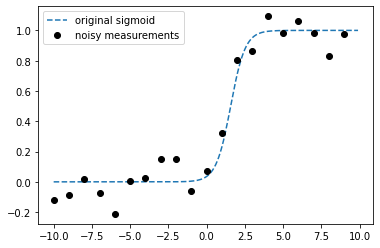

In [ ]:
true_x = np.arange(-10, 10, .1)       # Array for x-axis

true_y = sigmoid(true_x, 1, 2.1, 3.3, 0)  # Creating a sigmoid using some given values and the x-array

#########
## Generate some fake measurements from experiment
#########
xdata = np.arange(-10,10,1)

y = sigmoid(xdata, 1, 2.1, 3.3, 0) 
y_noise = 0.1 * np.random.randn(y.size) # generating some random values (noise)
ydata = y+y_noise   # Adding this noise to the original sigmoid function
print(ydata)

# Plot:
plt.plot(true_x, true_y, '--', label = 'original sigmoid')
plt.plot(xdata, ydata,  'ko', label = 'noisy measurements')
plt.legend()

## Fitting using 'curve_fit'

In [ ]:
from scipy.optimize import curve_fit

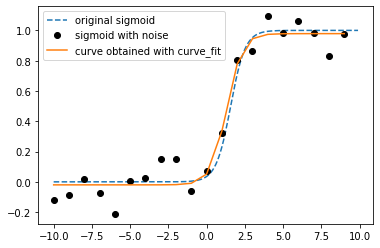

In [ ]:
values = curve_fit(sigmoid, xdata, ydata)[0]  
#curve_fit() returns the values for the parameters (popt) and their covariance (pcov)
# Why [0]? This way we save only popt on 'values'


y_fit=sigmoid(xdata, *values) # Evaluating such values 

# Plot
plt.plot(true_x, true_y, '--', label = 'original sigmoid')
plt.plot(xdata, ydata,  'ko', label = 'sigmoid with noise')
plt.plot(xdata, y_fit, label = 'curve obtained with curve_fit')
plt.legend()

Note: You can get also a so-called 'optimize warning'. This could be solved by using another optimzation method and/or bounds.

Optimzation methods available are:  
* [Levenberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) ('lm').

* [Trust Region Reflective algorithm](https://optimization.mccormick.northwestern.edu/index.php/Trust-region_methods) (‘trf’).

* [Dogleg algorithm](https://en.wikipedia.org/wiki/Powell%27s_dog_leg_method) (‘dogbox’)

Check [SciPy's documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

## Using minimize

In [ ]:
from scipy.optimize import minimize

To use [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) we need to define a function to be... guess what?

Correct! minimized

In [ ]:
def helper(values, x_data, y_data):
    # We minimize the mean-squared error (MSE)
    # we need to return a single number! (--> .sum()!)
    return ((y_data-sigmoid(x_data, *values))**2).sum()

In [ ]:
m = minimize(helper, [1, 1, 1, 1], args=(xdata, ydata)) # Where  [1, 1, 1, 1] represents the initial guess!
m

In [ ]:
y_fit2= sigmoid(xdata, *m.x) # Evaluating with the x-array obtained with minimize(),
                             # *m.x --> python hack to quickly unpack the values
plt.plot(xdata, ydata,  'ko', label = 'sigmoid with noise')
plt.plot(xdata, y_fit2, label = 'curve obtained with minimize')
plt.legend()

In [ ]:
plt.plot(xdata, y_fit2, '-', label = 'curve obtained with minimize')
plt.plot(xdata, y_fit, '-', label = 'curve obtained with curve_fit')
plt.legend()

# Using scikit-learn (To Do):

You will have to run a similar calculation but now with [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

First of all, you have to define a linear function, namely: $$y = mx+b$$

1. To Do: Define the linear function

In [ ]:
def linearFunction(x, m, b):
    pass #TODO

In [ ]:
x = np.arange(-4,4,0.5)
m = 2
b = 1

In [ ]:
line = linearFunction(x,m,b)  # Creating a line using your function and the values given
rng = np.random.default_rng()
l_noise = 0.5 * rng.normal(size=x.size)
noisy_line = line+l_noise

plt.plot(x, line, '--', label = 'original linear')
plt.plot(x, noisy_line, 'k', label = 'noisy linear')
plt.legend()

## 2.To Do: Use scikit-learn to perform linear regression 

--> Use the documentation

The plotting assumes that the LinearModel is called `reg`, and the predicted line is called `line_pred`.

In [ ]:
#TODO

In [ ]:
print('Intercept b:', reg.intercept_)
print('\nSlope m:', reg.coef_)

In [ ]:
plt.plot(x, noisy_line, 'k--', label = 'noisy linear')
plt.plot(x, line_pred, label = 'prediction')
plt.legend()

In [ ]:
plt.plot(x, line, '--',  label = 'original')
plt.plot(x, line_pred, 'o', label = 'prediction')
plt.legend()

## Curve fitting

3. To Do: Now use `curve_fit` **or** `minimize` to fit the linear equation using the noisy data `x` and `noisy_line`.

In [ ]:
#TODO 

___________________________________

# Part 2: MLP and CNN


In [ ]:
import tensorflow as tf # Library for machine learning and AI 

* Video: [Why Tensorflow?](https://www.youtube.com/watch?v=yjprpOoH5c8)
* Keras is an API for defining a model by layers (More info: [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras), [Building models with tf.keras](https://www.deeplearningdemystified.com/article/pdl-1))
* MNIST is a size-normalized database of handwritten digits used very often as example in deep and machine learning.

In [ ]:
mnist = tf.keras.datasets.mnist #loading mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #assigning the test and train data
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


4. To Do: What represents _x_ and what _y_ in this example? 

Answer: #TODO

5. To Do: Plot a sample of the dataset and print its respective label

In [ ]:
#TODO

## Creating the MLP model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
]) # Multilayer perceptron

6. To Do: Name 5 examples of activation functions

Answer:

*   
*    
*    
*    
*   
*   ...





In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=['acc']) #Configurations of the model

7. To Do: What is `adam`? 


Answer: #TODO

8. To Do: What does `sparse_categorical_crossentropy` mean? 

Answer: #TODO

9. To Do: What are `epochs`? 




Answer: #TODO

In [ ]:
h = model.fit(x_train, y_train, epochs=10) # Training the model

# Plotting how the model learned:

The 'keys()' method returns the list of keys contained in a dictionary, e.g.:

In [ ]:
print(h.history.keys())

10. To Do: Plot the loss (edit just one line)

In [ ]:
x_axis = np.arange(10)
y_axis = #TODO
plt.plot(x_axis, y_axis, 'ko--')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xticks(np.arange(10), np.arange(10)+1) # sets the ticks for the plot on the x axis

# Evaluating the model on previously unseen data: 

In [ ]:
model.evaluate(x_test, y_test)

## MAGIC, around 98% accuracy!

# Convolutional Neural Network

CNNs have usually a higher performance than other neural networks for image analysis. They contain a convolutional layer, a pooling layer and a Fully Connected (FC) layer:

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), input_shape=(28,28,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

11. To Do: What is "(3,3)" doing in Conv2D?

Answer: #TODO

12. To Do: Next, **compile** the model similar to the MLP shown above:

In [ ]:
#TODO

13. To Do: Next, you will **fit** the model. There is an error. Can you fix it? 

In [ ]:
h2 = cnn.fit(x_, y_, epochs=10)

Plot and evaluate your fancy CNN⚛

In [ ]:
plt.plot(np.arange(10), h2.history['loss'], 'ko--')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xticks(np.arange(10), np.arange(10)+1)

In [ ]:
cnn.evaluate(x_test, y_test)

Report here the final test accuracy: